# 🦋 Loyiha qadamlari 
1) Muammoni tushunish va maqsad  ✅
2) Ma’lumotlarni yuklash va ko‘rish ✅  
3) EDA (Exploratory Data Analysis)  ✅
4) Tozalash, Feature enginering  ✅
5) Ma’lumotlarni tayyorlash (scaling, encoding) ✅
6) Data Setni Test va Train Guruhlarga bo`lish  ✅
7) Turli algoritmlar bilan modelni sinab ko`rish  ✅
8) Modelni baholash (R2, RMSE, MAE, Accuracy)  ✅
9) Eng yaxshi modelni tanlash  ✅
10) Grid Search CV va Randomised Search CV bo`yicha taxlillar ✅
11) Shap Value ni ko`rish ✅
12) Natijalarni vizualizatsiya qilish  ✅
13) Modelni saqlash  ✅

# ⚽ Loyiha Maqsadi Eng ko`p Go`l urgan Futbolchini aniqlash 

# 🗎 Data Setni chaqirib olamiz 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import logging
logging.basicConfig(
    filename="info_log.log",
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
try:
    df = pd.read_csv('appearances.csv')
    logging.info("Data Set Muvaffaqiyatli Yuklandi")
except FileNotFoundError as e:
    logging.error("Data Set Topilmadi: %s", e)


# 🔍 Data Set haqida malumotlarni ko`rib chiqamiz 

In [3]:
df.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706806 entries, 0 to 1706805
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   appearance_id           object
 1   game_id                 int64 
 2   player_id               int64 
 3   player_club_id          int64 
 4   player_current_club_id  int64 
 5   date                    object
 6   player_name             object
 7   competition_id          object
 8   yellow_cards            int64 
 9   red_cards               int64 
 10  goals                   int64 
 11  assists                 int64 
 12  minutes_played          int64 
dtypes: int64(9), object(4)
memory usage: 169.3+ MB


# ⇮ Ushbu Datsetdagi malumotlarga asoslangan holda target qiymat sifatida "goals" ustunini oldik

In [4]:
df["goals"].unique()


array([2, 0, 1, 3, 4, 5, 6])

# EDA (Exploratory Data Analysis) ni ko`rib chiqamiz 

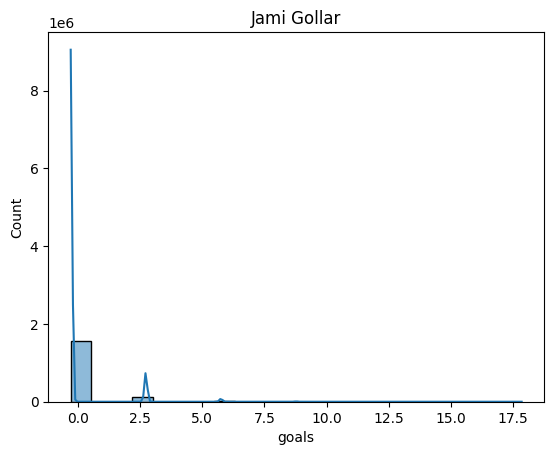

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['goals'], kde=True)
plt.title('Jami Gollar')
plt.show()

# Correlyatsiya Jadvali 

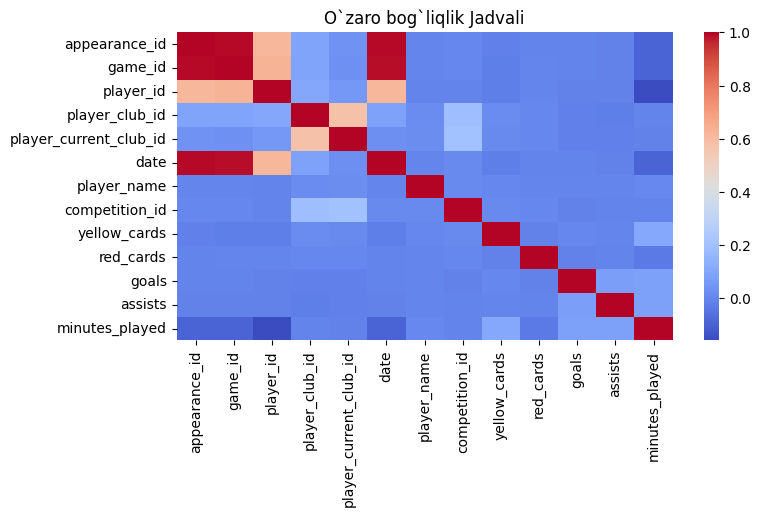

In [25]:
corr = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='coolwarm')
plt.title('O`zaro bog`liqlik Jadvali')
plt.show()

# O`zaro bog`liqlikni ko`rib olamiz

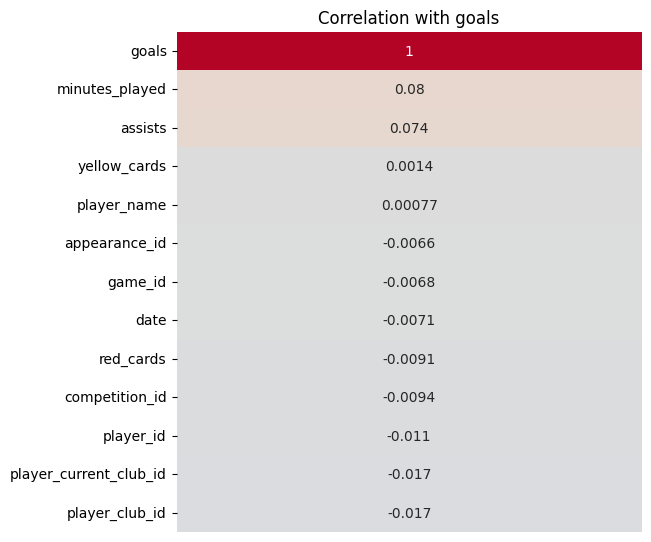

In [26]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['goals'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with goals')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()

#  🌱 Data Preprocessing

In [14]:
df.isnull().sum()

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               6
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
class DataPreprocessing:
    def __init__(self, df):
        self.df = df.copy() 
        self.encoder = LabelEncoder()
        self.scaler = StandardScaler()

    def tozala(self):
        for col in self.df.columns:
            if self.df[col].isnull().any():
                if self.df[col].dtype == 'object':
                    self.df[col] = self.df[col].fillna(self.df[col].mode()[0])
                else:
                    self.df[col] = self.df[col].fillna(self.df[col].mean())
        return self

    def encodla(self):
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                if self.df[col].nunique() <= 6:
                    dummies = pd.get_dummies(self.df[col], prefix=col, dtype=int)
                    self.df = pd.concat([self.df.drop(columns=[col]), dummies], axis=1)
                else:
                    self.df[col] = self.encoder.fit_transform(self.df[col])
        return self

    def scaling_qil(self):
        numeric_cols = self.df.select_dtypes(include=['int64', 'float64']).columns.drop("goals")
        self.df[numeric_cols] = self.scaler.fit_transform(self.df[numeric_cols])
        return self
     

    def get_df(self):
        return self.df
    
    
preprocessor = DataPreprocessing(df)
preprocessor.tozala().encodla().scaling_qil()
df=preprocessor.get_df()

In [6]:
df['goals'].unique()

array([2, 0, 1, 3, 4, 5, 6])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706806 entries, 0 to 1706805
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   appearance_id           float64
 1   game_id                 float64
 2   player_id               float64
 3   player_club_id          float64
 4   player_current_club_id  float64
 5   date                    float64
 6   player_name             float64
 7   competition_id          float64
 8   yellow_cards            float64
 9   red_cards               float64
 10  goals                   int64  
 11  assists                 float64
 12  minutes_played          float64
dtypes: float64(12), int64(1)
memory usage: 169.3 MB


# Data Setni Preprocessingdan keyingi holati

In [8]:
df.describe(include='all')

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.706806e+06,1.706806e+06,1.706806e+06,1.706806e+06,1.706806e+06,1.706806e+06,1.706806e+06,1.706806e+06,1.706806e+06,1.706806e+06,1.706806e+06,1.706806e+06,1.706806e+06
mean,1.896994e-16,-7.907695e-16,2.099482e-16,2.198062e-17,-1.055736e-17,1.960938e-16,-1.297398e-17,-1.308846e-16,4.143014e-17,-2.603954e-18,9.589432e-02,3.561860e-17,8.116178e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.309349e-01,1.000000e+00,1.000000e+00
min,-1.732050e+00,-1.435064e+00,-1.080060e+00,-3.772679e-01,-3.680479e-01,-1.747231e+00,-1.753650e+00,-2.024388e+00,-4.029585e-01,-6.162350e-02,0.000000e+00,-2.643754e-01,-2.269228e+00
25%,-8.660249e-01,-8.676468e-01,-7.796911e-01,-3.426351e-01,-3.374405e-01,-8.675413e-01,-8.715303e-01,-6.808679e-01,-4.029585e-01,-6.162350e-02,0.000000e+00,-2.643754e-01,-8.022254e-01
50%,0.000000e+00,-1.282612e-01,-3.106858e-01,-2.780594e-01,-2.847073e-01,7.562160e-03,3.699734e-03,8.685789e-02,-4.029585e-01,-6.162350e-02,0.000000e+00,-2.643754e-01,6.981185e-01
75%,8.660249e-01,6.848409e-01,4.973924e-01,-8.385104e-02,-1.194089e-01,8.597331e-01,8.804454e-01,6.626522e-01,-4.029585e-01,-6.162350e-02,0.000000e+00,-2.643754e-01,6.981185e-01
max,1.732050e+00,2.115112e+00,6.023132e+00,1.288674e+01,9.800889e+00,1.680716e+00,1.710343e+00,2.006172e+00,5.070798e+00,1.622758e+01,6.000000e+00,2.074687e+01,2.631895e+00


# Correlation jadvalini yana bir ko`rib olaylik

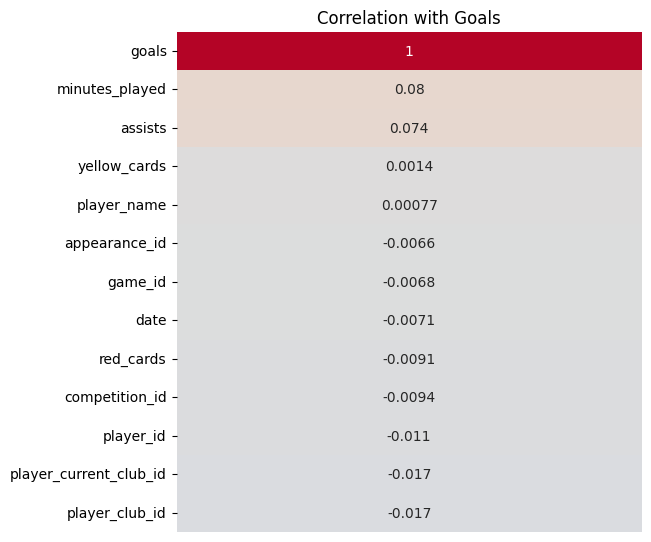

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['goals'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with Goals')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706806 entries, 0 to 1706805
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   appearance_id           float64
 1   game_id                 float64
 2   player_id               float64
 3   player_club_id          float64
 4   player_current_club_id  float64
 5   date                    float64
 6   player_name             float64
 7   competition_id          float64
 8   yellow_cards            float64
 9   red_cards               float64
 10  goals                   float64
 11  assists                 float64
 12  minutes_played          float64
dtypes: float64(13)
memory usage: 169.3 MB


# ☑ Data Setimizni test train qismlarga ajratib olamiz 

In [6]:
x = df.drop("goals", axis=1)
y = df['goals']

In [7]:

from sklearn.model_selection import train_test_split

In [8]:

x_train,x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# SHAP nima uchun foydalaniladi?

- 🧠 **Modelni tushunish**  
  Murakkab modellarning  qaror qabul qilish jarayonini aniqlash.

- 🔍 **Feature Importance**  
  Har bir kiruvchi o‘zgaruvchining model natijasiga ta’sirini aniqlash.

- 🔄 **Individual bashoratni izohlash**  
  Modelning har bir prediktsiyasini nima uchun shunday qilganini ko‘rsatish.

- 🔐 **Ishonchlilikni oshirish**  
  Foydalanuvchilar va mutaxassislarga model qarorlarini tushuntirish orqali ishonchni kuchaytirish.

- 🛠️ **Model diagnostikasi**  
  Modeldagi muammolarni aniqlash va yaxshilash uchun yordam beradi.

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


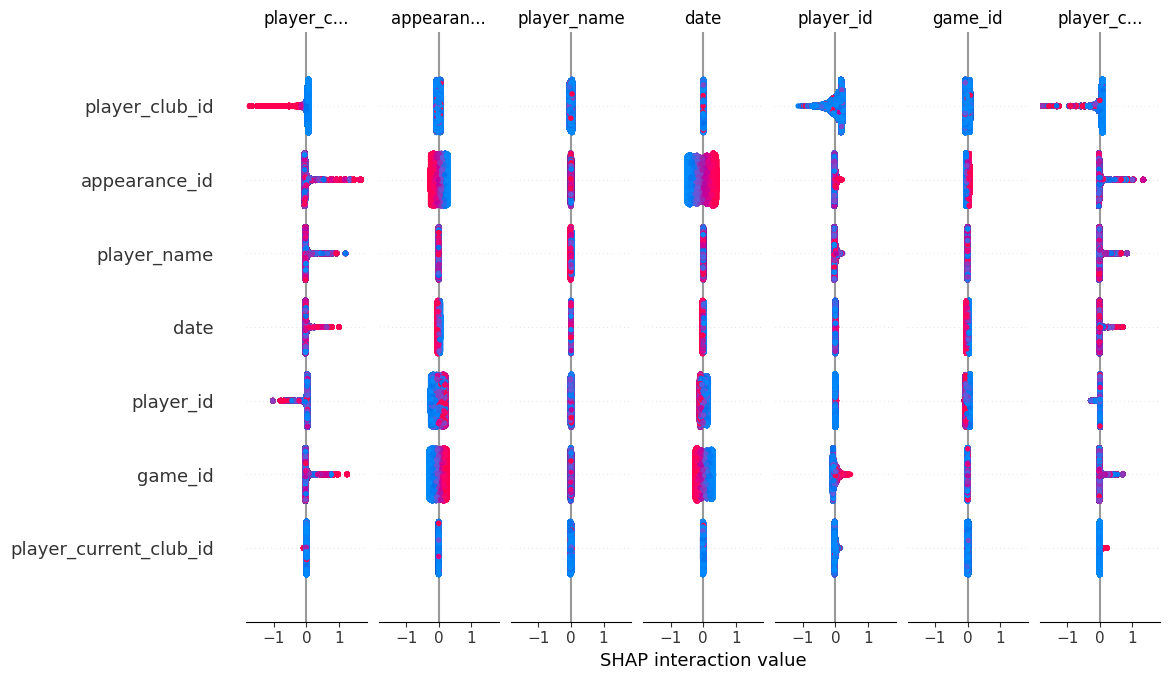

In [10]:
import shap
from sklearn.linear_model import LogisticRegression

# Modelni o'qitish
model = LogisticRegression().fit(x_train, y_train)

# SHAP explainer yaratish
explainer = shap.LinearExplainer(model, x_train, feature_perturbation="interventional")

# SHAP qiymatlarini hisoblash
shap_values = explainer.shap_values(x_test)

# Vizualizatsiya
shap.summary_plot(shap_values, x_test)


# 🗹 Bizga kerakli 4 ta Algoritmni chaqirib ular bo`yicha Eng baland Accuracy Score ni aniqlaymiz 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
   
}


for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} accuracy: {acc:.2f}")


Logistic Regression accuracy: 0.91
Decision Tree accuracy: 0.85
KNN accuracy: 0.91
Random Forest accuracy: 0.90


# Logistic Regression Algoritmini tanlaymiz va u bo`yicha ishlashda davom qilamiz 

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model

LogisticRegression()

# Modelni Train qilib ko`ramiz

In [14]:
model.fit(x_train, y_train)

LogisticRegression()

# Modelni Test qilib ko`ramiz

In [15]:
pred_model = model.predict(x_test)

In [16]:
pred_model

array([0, 0, 0, ..., 0, 0, 0], shape=(170681,))

In [29]:
y_true = y_test

# Modelimizda Accuracy Score Natijasi

In [31]:
score_acc = accuracy_score(y_true, pred_model)
score_acc

0.9128256806557262

# Modelni K Cross Val bo`yicha tekshiramiz 

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

model = LogisticRegression()  
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, x, y, cv=kf, scoring="accuracy")
print(scores)

[0.91342915 0.91500787 0.91439854 0.9139474  0.91446299]


In [27]:
print(np.mean(scores). round(4))

0.9142


In [28]:
np.std(scores)

np.float64(0.0005304999110004448)

# Hyperparameter Tuning Grid Search CV bo`yicha & Algoritm Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],  
    'penalty': ['l2']
}

dt = LogisticRegression(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_dt = grid_search.best_estimator_


y_pred_dt = best_dt.predict(x_test)
print("Decision Tree Best Parameters:", grid_search.best_params_)


# Eng yaxshi parametrlar va natija
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9144541995118691


# Hyperparameter Tuning Randomised Search CV bo`yicha & Algoritm Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.metrics import accuracy_score


param_dist = {
    'C': np.logspace(-3, 3, 100),  
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

dt = LogisticRegression(random_state=42)

dt_random = RandomizedSearchCV(
    dt, param_distributions=param_dist,
    n_iter=20, scoring='accuracy', cv=5, random_state=42
)

dt_random.fit(x_train, y_train)
dt_best = dt_random.best_estimator_


y_pred = dt_best.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



print("Best Parameters (Random):", dt_random.param_dist)
print("Best Score (Random):", dt_random.param_dist)

# Algoritmlar bo`yicha Natijalar

In [33]:
from tabulate import tabulate
df_malumot = [
    {
        "ALgoritm" : "Linear Regression",
        "Accuracy":"0.91"
    },

    {
        "ALgoritm" : "Decision Tree",
        "Accuracy":"0.85"
    },


    {
        "ALgoritm" : "KNN",
        "Accuracy":"0.91"
    },

    {
        "ALgoritm" : "Random Forest",
        "Accuracy":"0.90"
    },

  
]


print(tabulate(df_malumot, headers="keys", tablefmt="grid"))

+-------------------+------------+
| ALgoritm          |   Accuracy |
+===================+============+
| Linear Regression |       0.91 |
+-------------------+------------+
| Decision Tree     |       0.85 |
+-------------------+------------+
| KNN               |       0.91 |
+-------------------+------------+
| Random Forest     |       0.9  |
+-------------------+------------+


# Logistic Regression bo`yicha natijalar 

In [34]:
from tabulate import tabulate
df_malumot = [
    {
        "ALgoritm" : "Logistic Regression",
        "K Cros Val":"0.913",
        "Grid Search Score":"0.944",
        "Randomised Search Score":"0.943"
    },
  
]


print(tabulate(df_malumot, headers="keys", tablefmt="grid"))    
  

+---------------------+--------------+---------------------+---------------------------+
| ALgoritm            |   K Cros Val |   Grid Search Score |   Randomised Search Score |
+=====================+==============+=====================+===========================+
| Logistic Regression |        0.913 |               0.944 |                     0.943 |
+---------------------+--------------+---------------------+---------------------------+


# Tayyor bo`lgan Modelni saqlab olamiz pkl fayl bo`yicha: pkl — bu Pickle modulidan foydalangan holda yaratilgan fayl bo‘lib, Python obyektlarini (model, dictionary, dataframe va h.k.) saqlash va keyinroq yuklash uchun ishlatiladi.

In [35]:
import joblib 

joblib.dump(model, 'ML_2_Model.pkl')

['ML_2_Model.pkl']

# joblib — bu pickle ga o‘xshash, lekin katta o‘lchamli numpy array yoki sklearn modellari uchun tezroq va samaraliroq ishlaydi.

In [36]:
import joblib

joblib.dump(model, 'ML_2_model.joblib')
print("Model 'ML_2_model.joblib' nomli faylga saqlandi.")


Model 'ML_2_model.joblib' nomli faylga saqlandi.
